In [4]:
pip install gensim

In [5]:
pip install gensim

In [ ]:
pip install pyLDAvis


In [8]:
pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.9 MB/s eta 0:00:00


In [49]:
!pip install pyLDAvis

In [9]:
# Chargement des libraries
import requests
from bs4 import BeautifulSoup
import argparse
import math
from Bio import Entrez
import requests
from bs4 import BeautifulSoup
import string
import re
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from collections import  Counter
from wordcloud import WordCloud
from textwrap import wrap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer



In [ ]:
!pip install biopython


ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

#**Web scraping**


In [10]:
# Liste pour stocker les articles
articles = []

# Boucle pour parcourir les 150 premières pages
for page in range(1, 151):  # De 1 à 150 inclus
    # Construire l'URL pour chaque page
    url = f'https://pubmed.ncbi.nlm.nih.gov/?term=cancer&page={page}'

    # Récupération et analyse du  contenu HTML de la page
    response = requests.get(url)

    # Analyse du contenu HTML
    soup = BeautifulSoup(response.content, 'html.parser')

    # Boucle pour extraire les informations de chaque article
    for article in soup.find_all('div', class_='docsum-content'):
        # Extraire le titre de l'article
        title = article.find('a', class_='docsum-title').get_text().strip()

        # Extraire les auteurs de l'article
        authors = article.find('span', class_='docsum-authors').get_text().strip()

        # Extraire la date de publication de l'article
        pub_date = article.find('span', class_='docsum-journal-citation').get_text().strip()

        # Extraire le résumé de l'article
        abstract = article.find('div', class_='full-view-snippet').get_text().strip()

        # Ajout des informations de l'article dans la liste
        articles.append({
            'title': title,
            'authors': authors,
            'pub_date': pub_date,
            'abstract': abstract
        })

In [11]:
print(articles)
print(f"Nombre total d'articles récupérés : {len(articles)}")

[{'title': 'Cancer and cure: A critical analysis.', 'authors': 'Roy PS, Saikia BJ.', 'pub_date': 'Indian J Cancer. 2016 Jul-Sep;53(3):441-442. doi: 10.4103/0019-509X.200658.', 'abstract': 'Is cancer curable? The short answer to this question is "Yes." In fact, all cancers are curable if they are caught early enough. Cancer cells continue to grow unless one of four things occur: (1) The cancerous mass is removed surgically; (2) using chem …'}, {'title': 'Global Cancer Incidence and Mortality Rates and Trends--An Update.', 'authors': 'Torre LA, Siegel RL, Ward EM, Jemal A.', 'pub_date': 'Cancer Epidemiol Biomarkers Prev. 2016 Jan;25(1):16-27. doi: 10.1158/1055-9965.EPI-15-0578. Epub 2015 Dec 14.', 'abstract': "There are limited published data on recent cancer incidence and mortality trends worldwide. We used the International Agency for Research on Cancer's CANCERMondial clearinghouse to present age-standardized cancer incidence and death rates for 2003-2007 …"}, {'title': 'Tumor microen

In [12]:
# Fonction pour rechercher le terme 'Cance' dans la base de données PubMed

def search(query):

    Entrez.email = 'avave.itir25@gmail.com'

    handle = Entrez.esearch(db='pubmed',
                            sort='relevance',
                            retmax='250000',
                            retmode='xml',
                            term=query)

    results = Entrez.read(handle)

    return results

studies = search('Cancer')
studiesIdList = studies['IdList']

# Fonction pour récupérer les détails des études à partir de leurs ID.
# Renvoie un dictionnaire contenant les détails des études.
def fetch_details(id_list):

    ids = ','.join(id_list)
    Entrez.email = 'avave.itir25@gmail.com'
    handle = Entrez.efetch(db='pubmed',
                           retmode='xml',
                           id=ids)

    results = Entrez.read(handle)

    return results

# Listes vides pour stocker les détails des études
title_list = []
abstract_list = []
journal_list = []
language_list = []
pubdate_year_list = []
pubdate_month_list = []

studies = fetch_details(studiesIdList)

# Définition de  la taille des chunks pour les requêtes par lot
chunk_size = 100

# Pour chaque chunk d'ID
for chunk_i in range(0, len(studiesIdList), chunk_size):

    chunk = studiesIdList[chunk_i:chunk_i + chunk_size]
    papers = fetch_details(chunk)
    for i, paper in enumerate(papers['PubmedArticle']):
        # Extraire et stocker le titre, le résumé, le journal, la langue et la date de publication de l'article
        title_list.append(paper['MedlineCitation']['Article']['ArticleTitle'])

        try:
            abstract_list.append(paper['MedlineCitation']['Article']['Abstract']['AbstractText'][0])
        except:
            abstract_list.append('No Abstract')

        journal_list.append(paper['MedlineCitation']['Article']['Journal']['Title'])
        language_list.append(paper['MedlineCitation']['Article']['Language'][0])

        try:
            pubdate_year_list.append(paper['MedlineCitation']['Article']['Journal']['JournalIssue']['PubDate']['Year'])
        except:
            pubdate_year_list.append('No Data')

        try:
            pubdate_month_list.append(paper['MedlineCitation']['Article']['Journal']['JournalIssue']['PubDate']['Month'])
        except:
            pubdate_month_list.append('No Data')

# Combinaison des listes en un DataFrame
df = pd.DataFrame(list(zip(title_list, abstract_list, journal_list, language_list, pubdate_year_list, pubdate_month_list)),
                  columns=['Title', 'Abstract', 'Journal', 'Language', 'Year', 'Month'])

# Enregistrement du DataFrame dans un fichier CSV
df.to_csv('pubmed_cancer_studies.csv', index=False)


In [13]:
print('Nombre total d\'articles bruts: {:}\n'.format(len(articles)))

Nombre total d'articles bruts: 1500



**# pré-nettoyage**


In [14]:
# Filtrage des lignes où la colonne 'Year' contient uniquement des chiffres
df = df[df['Year'].str.match(r'^[0-9]{4}$').fillna(False)]

# Suppression des lignes où 'Year' n'est pas une année de 4 chiffres
df = df[df['Year'].str.len() == 4]

# Affichage des informations sur la colonne 'Year' pour vérifier son type
print(df['Year'].info())

# Conversion de la colonne 'Year' en type 'int'
df['Year'] = df['Year'].astype(int)

# Filtrage des articles publiés à partir de l'année 2019
df = df[df['Year'] >= 2019]
df.reset_index(drop=True, inplace=True)
print(len(df))


<class 'pandas.core.series.Series'>
Index: 9973 entries, 0 to 9998
Series name: Year
Non-Null Count  Dtype 
--------------  ----- 
9973 non-null   object
dtypes: object(1)
memory usage: 155.8+ KB
None
2287


In [15]:
print('Nombre total d\'articles après la pré-nettoyage pour l\'analyse: {:}\n'.format(len(df)))

Nombre total d'articles après la pré-nettoyage pour l'analyse: 2287



# ***Nettoyage***

In [16]:
# Vérification des cellules vides dans le DataFrame
print(df.isnull().sum())

# Suppression des articles qui ne contient pas d'Abstract'
df = df[df['Abstract'] != 'No Abstract']


Title       0
Abstract    0
Journal     0
Language    0
Year        0
Month       0
dtype: int64


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2218 entries, 0 to 2286
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     2218 non-null   object
 1   Abstract  2218 non-null   object
 2   Journal   2218 non-null   object
 3   Language  2218 non-null   object
 4   Year      2218 non-null   int64 
 5   Month     2218 non-null   object
dtypes: int64(1), object(5)
memory usage: 121.3+ KB
None


**Normalization**

In [18]:
# Fonction de suppression des URL
def remove_URL(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Fonction de suppression des emojis
def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # Emoticônes
        u'\U0001F300-\U0001F5FF'  # Symboles et pictogrammes
        u'\U0001F680-\U0001F6FF'  # Symboles de transport et cartes
        u'\U0001F1E0-\U0001F1FF'  # Drapeaux (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

# Fonction de suppression des balises HTML
def remove_html(text):
    html_pattern = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html_pattern, '', text)

# Fonction de suppression des ponctuation
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Fonction de suppression des nouvelles lignes et les espaces supplémentaires
def remove_newlines(text):
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Fonction de suppression des chiffres
def remove_digits(text):
    text = re.sub(r'[0-9]', '', text)
    return text

def text_lowercase(text):
    return text.lower()

In [19]:
# Les fonctions de nettoyage au texte des Abstracts
# Suppretion des URL
df['Abstract'] = df['Abstract'].apply(remove_URL)

# Suppretion des emojis
df['Abstract'] = df['Abstract'].apply(remove_emoji)

# Suppretion des balises HTML
df['Abstract'] = df['Abstract'].apply(remove_html)

# Suppretion de la ponctuation
df['Abstract'] = df['Abstract'].apply(remove_punct)

# Suppretion les chiffres
df['Abstract'] = df['Abstract'].apply(remove_digits)

# COnvertion du texte en  miniscule
df['Abstract'] = df['Abstract'].apply(text_lowercase)


In [20]:
print(df['Abstract'].head())

0    this essay focuses on themes in explaining can...
1    currently breast cancer appears to be the most...
2    breast cancer affects one in seven women world...
5    autoimmune pancreatitis aip is now considered ...
7    cancers are a large and heterogeneous group of...
Name: Abstract, dtype: object


**Tokization**

In [23]:
## Fonction de tokenisation
import nltk
nltk.download('punkt')
def tokenize_text(text):
    return word_tokenize(text)

df['Abstract'] = df['Abstract'].apply(tokenize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [24]:
print(df[['Abstract']].head())

                                            Abstract
0  [this, essay, focuses, on, themes, in, explain...
1  [currently, breast, cancer, appears, to, be, t...
2  [breast, cancer, affects, one, in, seven, wome...
5  [autoimmune, pancreatitis, aip, is, now, consi...
7  [cancers, are, a, large, and, heterogeneous, g...


**Stopwords removal**

In [25]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Suppretion les stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['Abstract'] = df['Abstract'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
print(df[['Abstract']].head())

                                            Abstract
0  [essay, focuses, themes, explaining, cancer, f...
1  [currently, breast, cancer, appears, widesprea...
2  [breast, cancer, affects, one, seven, women, w...
5  [autoimmune, pancreatitis, aip, considered, pa...
7  [cancers, large, heterogeneous, group, maligna...


**Stemming**

In [27]:
from nltk.stem import PorterStemmer
nltk.download('punkt')
stemmer = PorterStemmer()
def stem_tokens(tokens):
    # Appliquation du stemming à chaque token
    return [stemmer.stem(token) for token in tokens]

df['Abstract'] = df['Abstract'].apply(stem_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
print(df[['Abstract']])

                                               Abstract
0     [essay, focus, theme, explain, cancer, find, o...
1     [current, breast, cancer, appear, widespread, ...
2     [breast, cancer, affect, one, seven, women, wo...
5     [autoimmun, pancreat, aip, consid, pancreat, m...
7     [cancer, larg, heterogen, group, malign, tumor...
...                                                 ...
2282  [inform, recent, cancer, statist, import, plan...
2283  [exosom, endosomalderiv, vesicl, play, major, ...
2284  [centrosom, abnorm, hallmark, human, cancer, s...
2285  [lynch, syndrom, hereditari, nonpolyposi, colo...
2286  [incid, cancer, new, york, state, ny, includ, ...

[2218 rows x 1 columns]


**Lemmatization**

In [29]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
stemmer = SnowballStemmer('english')

lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    # Appliquation de la la lemmatisation à chaque token
    return [lemmatizer.lemmatize(token, pos='v') for token in tokens]


df['Abstract'] = df['Abstract'].apply(lemmatize_tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [30]:
print(df[['Abstract']])

                                               Abstract
0     [essay, focus, theme, explain, cancer, find, o...
1     [current, breast, cancer, appear, widespread, ...
2     [breast, cancer, affect, one, seven, women, wo...
5     [autoimmun, pancreat, aip, consid, pancreat, m...
7     [cancer, larg, heterogen, group, malign, tumor...
...                                                 ...
2282  [inform, recent, cancer, statist, import, plan...
2283  [exosom, endosomalderiv, vesicl, play, major, ...
2284  [centrosom, abnorm, hallmark, human, cancer, s...
2285  [lynch, syndrom, hereditari, nonpolyposi, colo...
2286  [incid, cancer, new, york, state, ny, includ, ...

[2218 rows x 1 columns]


# ***Analyse exploratoire des données***



In [31]:
df.loc[df.Year == 2024].sample(5)[['Abstract', 'Year']]

Abstract  Year
1363  [cancer, group, diseas, character, uncontrol, ...  2024
2125  [cancer, diseas, caus, genet, nongenet, enviro...  2024
97    [hypopharyng, squamou, cell, carcinoma, hscc, ...  2024
1421  [dna, replic, sister, chromatid, cohes, dscc, ...  2024
975   [incid, surviv, metropolitan, franc, incid, su...  2024

In [32]:
label_counts = df['Year'].value_counts()
label_counts

Year
2020    430
2022    417
2021    406
2019    396
2023    376
2024    193
Name: count, dtype: int64

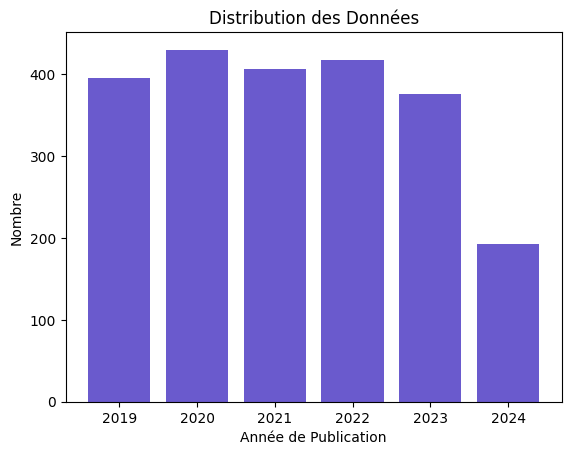

In [33]:
# Compte des occurrences de chaque label (année)
label_counts = df['Year'].value_counts()
labels = label_counts.index.tolist()
counts = label_counts.tolist()

plt.bar(labels, counts, color = 'slateblue')

plt.xlabel('Année de Publication')
plt.ylabel('Nombre')
plt.title('Distribution des Données')

plt.show()


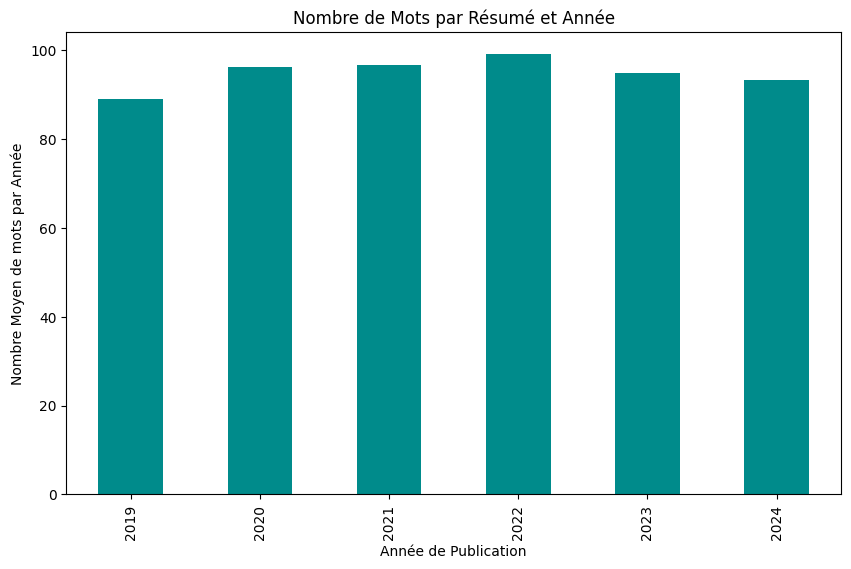

In [34]:
# Calcule du nombre de mots pour chaque Abstract
df['word_count'] = df['Abstract'].apply(len)

disease_word_count = df.groupby('Year')['word_count'].mean()
disease_word_count.plot(kind='bar', figsize=(10, 6), color='darkcyan')
plt.xlabel('Année de Publication')
plt.ylabel('Nombre Moyen de mots par Année')
plt.title('Nombre de Mots par Résumé et Année')
plt.show()


In [35]:
df['Year'] = df['Year'].astype(str)
df_grouped = df[['Year', 'Abstract']].groupby('Year').agg(lambda x: ' '.join([' '.join(i) for i in x]))
df_grouped.head()

Abstract
Year                                                   
2019  essay focus theme explain cancer find order di...
2020  japan clinic oncolog group lung cancer studi g...
2021  cancer cell signific chang occur activ signal ...
2022  current breast cancer appear widespread cancer...
2023  past decad intermedi advanc cancer stage precl...

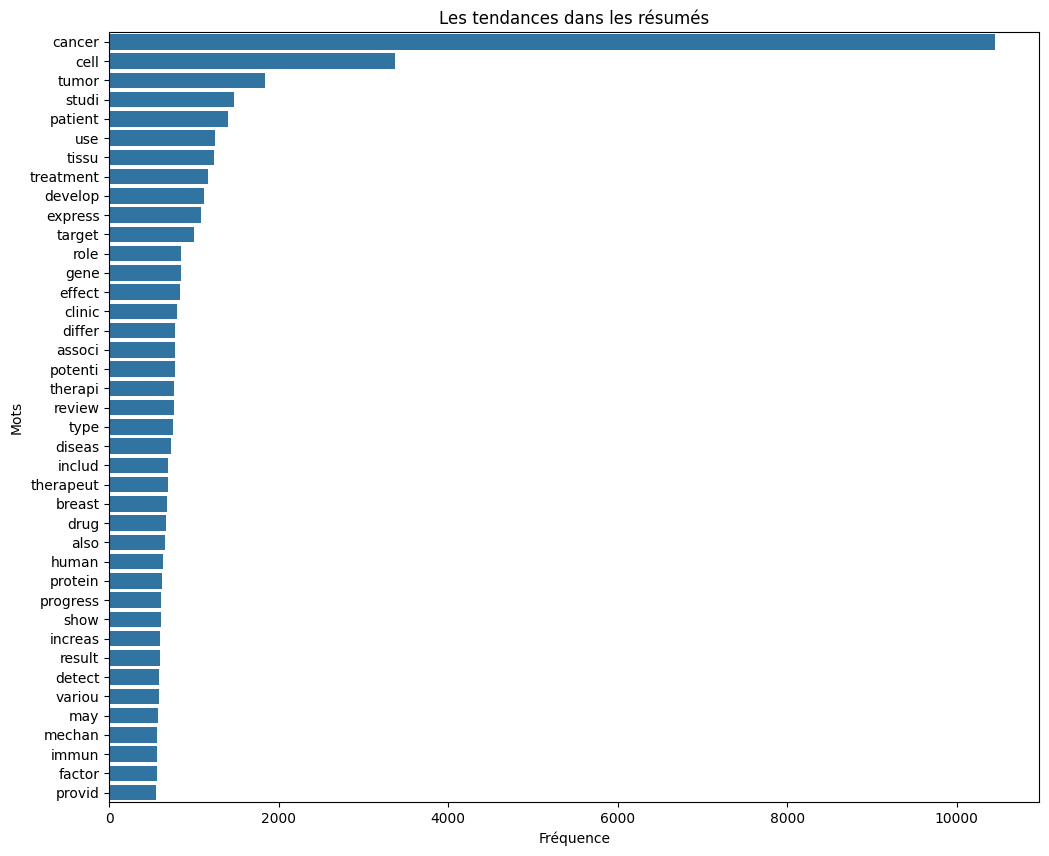

In [36]:
# Top Fréquence d'apparition des mots
def plot_top_non_stopwords_barchart(tokens):
    corpus = [word for sublist in tokens for word in sublist]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:40]:
            x.append(word)
            y.append(count)

    plt.figure(figsize=(12, 10))
    sns.barplot(x=y, y=x)
    plt.xlabel('Fréquence')
    plt.ylabel('Mots')
    plt.title('Les tendances dans les résumés')
    plt.show()

plot_top_non_stopwords_barchart(df['Abstract'])


**TF-IDF**

    aa  aaa  aacr  aadt  aah  aanat  aapc  aapgfet  aax  abandon  ...   μs  \
0  0.0  0.0   0.0   0.0  0.0    0.0   0.0      0.0  0.0      0.0  ...  0.0   
1  0.0  0.0   0.0   0.0  0.0    0.0   0.0      0.0  0.0      0.0  ...  0.0   
2  0.0  0.0   0.0   0.0  0.0    0.0   0.0      0.0  0.0      0.0  ...  0.0   
3  0.0  0.0   0.0   0.0  0.0    0.0   0.0      0.0  0.0      0.0  ...  0.0   
4  0.0  0.0   0.0   0.0  0.0    0.0   0.0      0.0  0.0      0.0  ...  0.0   

   πsubunitcontain  ωamidas  маterial   ⅱa   ⅱb   ⅱc   ⅲa  ⅲaand  ⅲband  
0              0.0      0.0       0.0  0.0  0.0  0.0  0.0    0.0    0.0  
1              0.0      0.0       0.0  0.0  0.0  0.0  0.0    0.0    0.0  
2              0.0      0.0       0.0  0.0  0.0  0.0  0.0    0.0    0.0  
3              0.0      0.0       0.0  0.0  0.0  0.0  0.0    0.0    0.0  
4              0.0      0.0       0.0  0.0  0.0  0.0  0.0    0.0    0.0  

[5 rows x 12755 columns]
Top terms for year 2019
cancer       0.085479
cell         0.

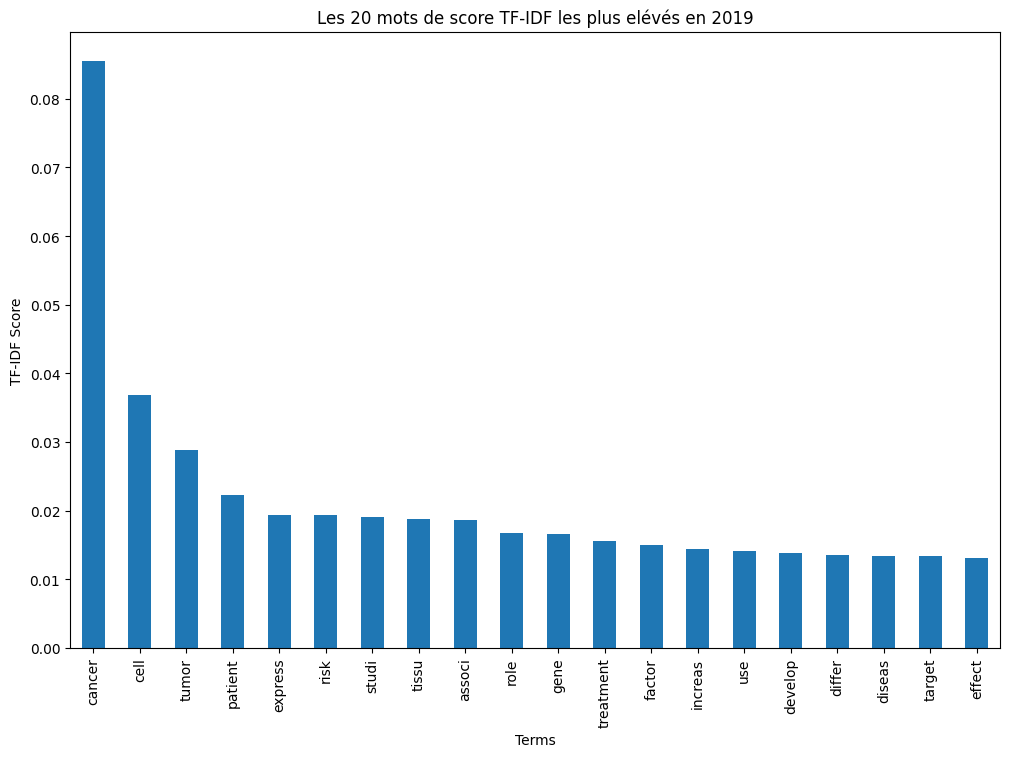

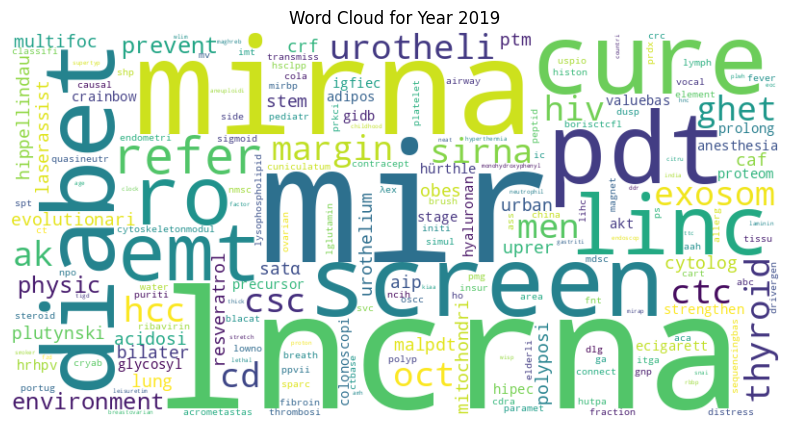

Top terms for year 2020
cancer       0.084542
cell         0.040592
tumor        0.027857
patient      0.025075
studi        0.022709
treatment    0.022392
tissu        0.021060
develop      0.018836
breast       0.018233
diseas       0.017850
therapi      0.017133
express      0.017108
use          0.016757
role         0.016458
immun        0.016090
human        0.016041
target       0.014732
clinic       0.014634
review       0.013847
differ       0.013427
dtype: float64


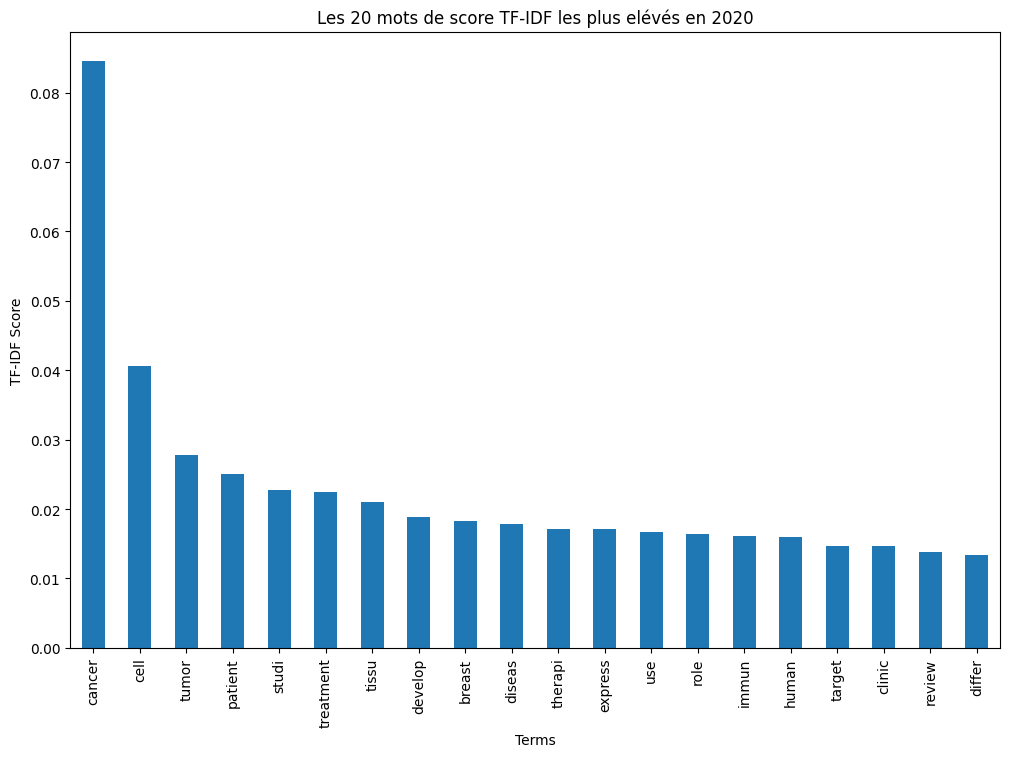

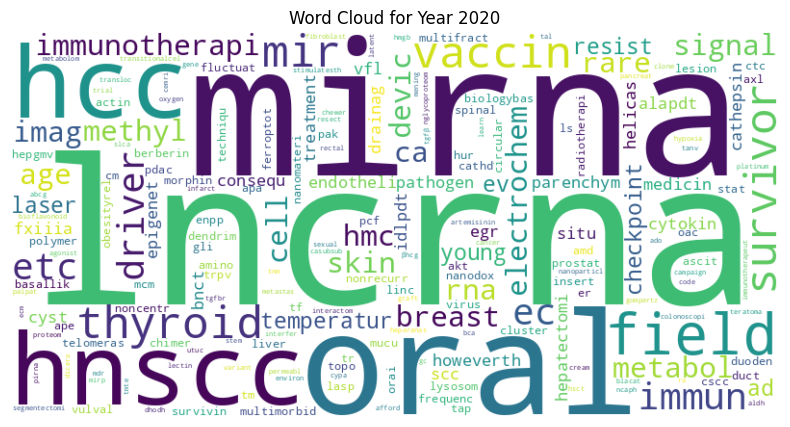

Top terms for year 2021
cancer       0.084032
cell         0.045156
tumor        0.026939
patient      0.021290
express      0.020469
tissu        0.020447
studi        0.019778
target       0.019297
develop      0.019083
drug         0.018486
use          0.018130
treatment    0.018112
effect       0.017992
therapi      0.017438
gene         0.016961
type         0.016595
associ       0.016505
protein      0.016498
therapeut    0.016424
differ       0.015616
dtype: float64


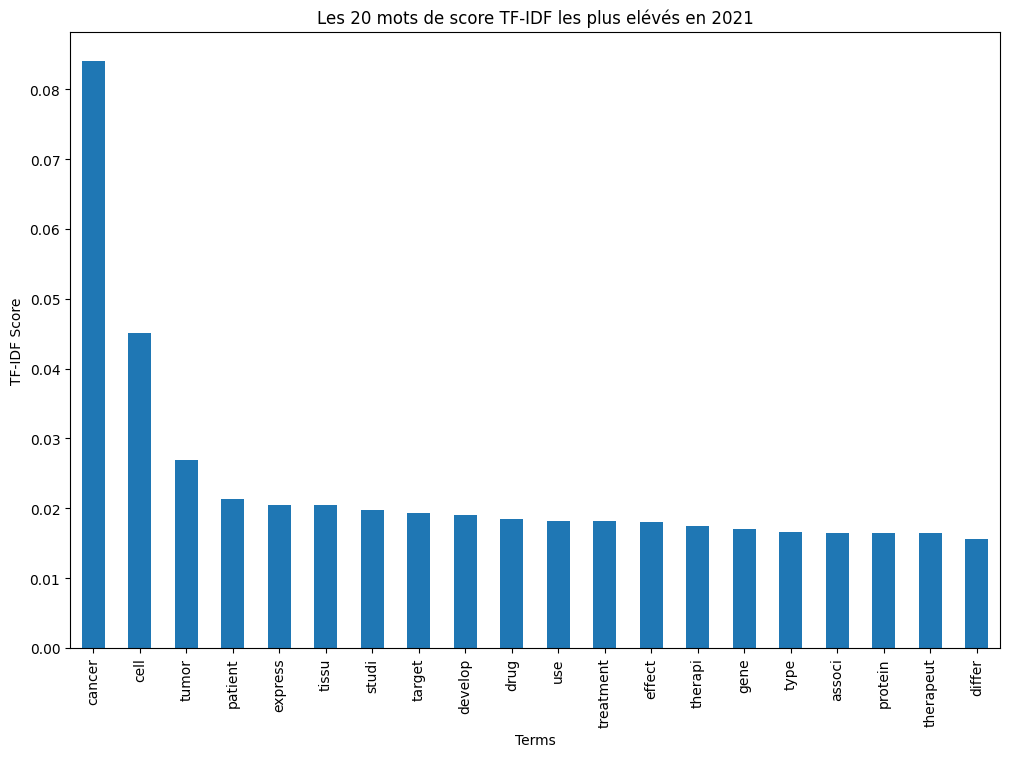

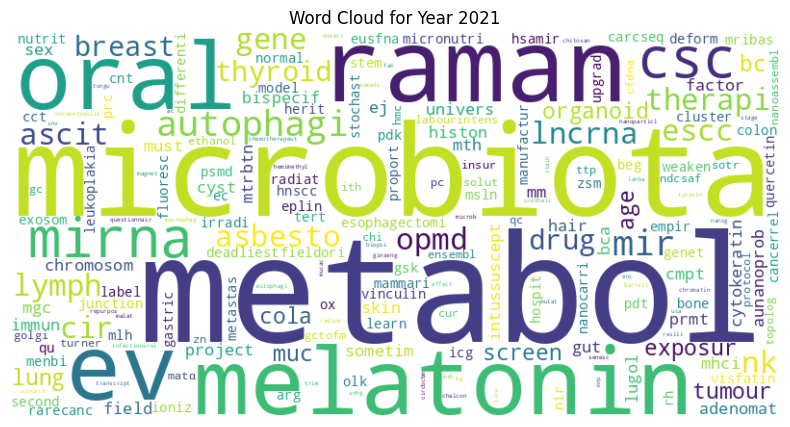

Top terms for year 2022
cancer       0.079845
cell         0.038105
tumor        0.024837
patient      0.022888
studi        0.021789
develop      0.019783
tissu        0.018890
treatment    0.018541
use          0.017445
express      0.015885
drug         0.015500
clinic       0.015428
target       0.014931
gene         0.014898
differ       0.014731
type         0.014554
potenti      0.014263
effect       0.014150
review       0.013945
therapi      0.013807
dtype: float64


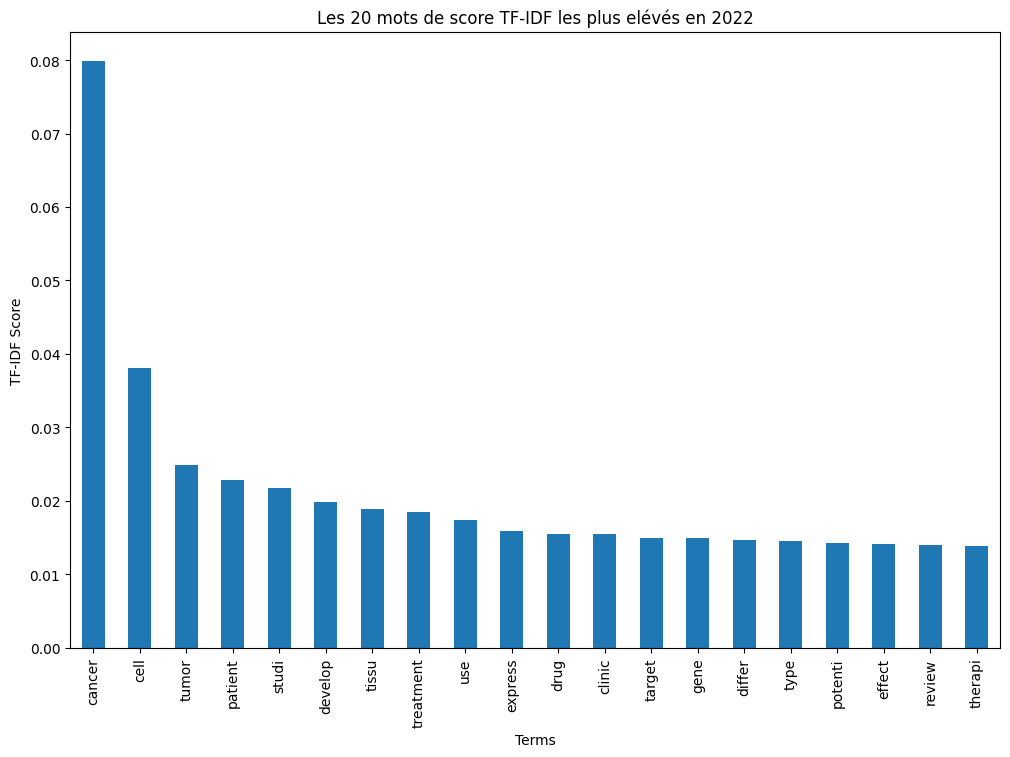

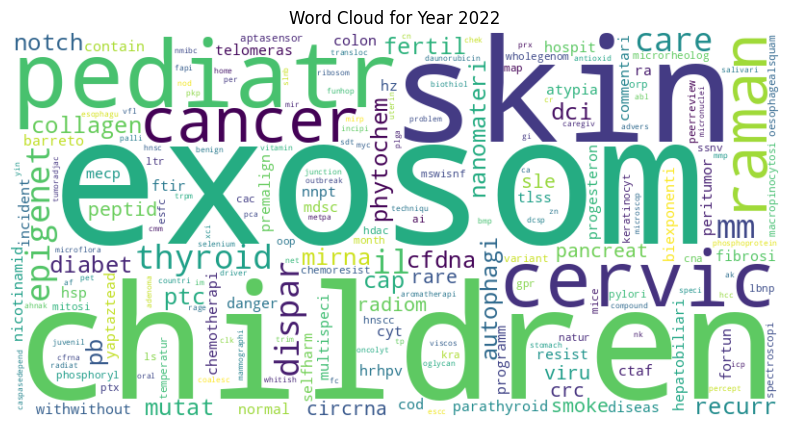

Top terms for year 2023
cancer       0.079369
cell         0.038787
tumor        0.025090
studi        0.022166
patient      0.021916
use          0.020214
gene         0.019301
treatment    0.018802
target       0.018145
effect       0.018033
express      0.017472
breast       0.017178
tissu        0.016978
role         0.015901
therapi      0.015685
develop      0.015643
type         0.014859
therapeut    0.014511
drug         0.014404
associ       0.013109
dtype: float64


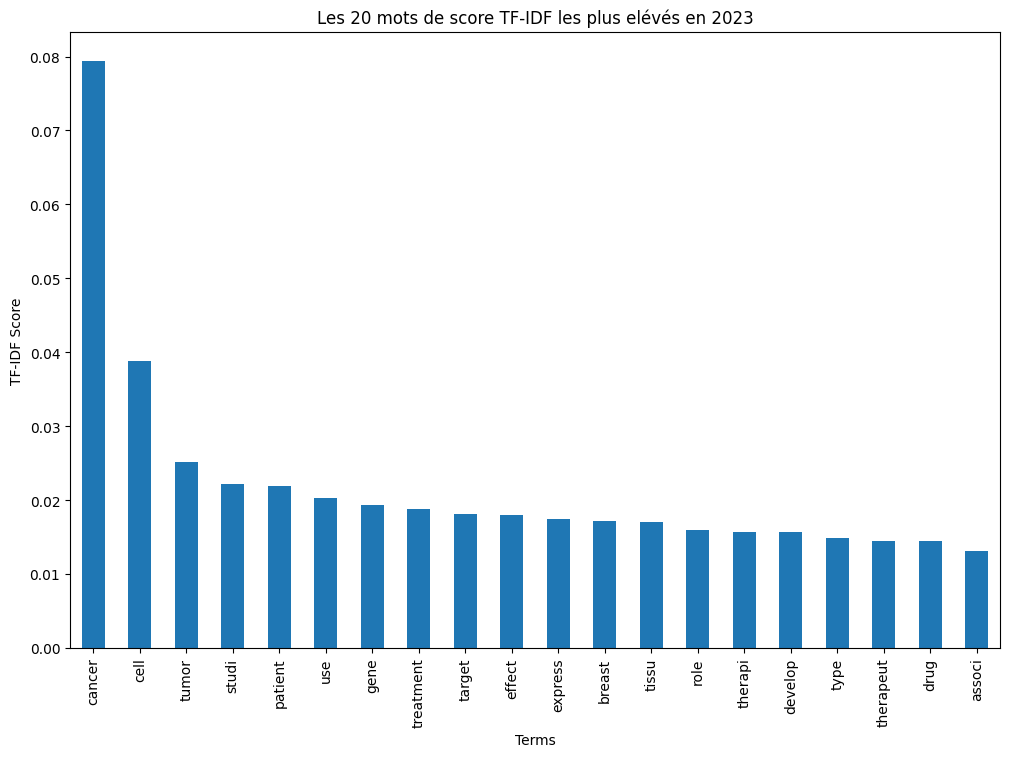

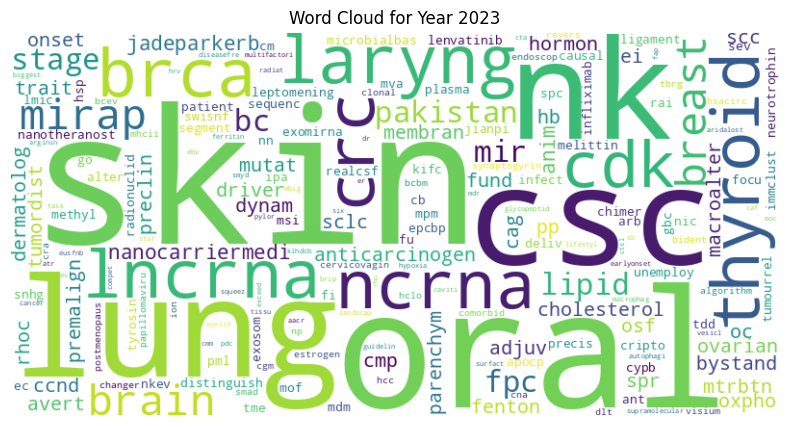

Top terms for year 2024
cancer       0.087548
cell         0.034267
treatment    0.026523
tumor        0.024322
studi        0.021414
develop      0.020447
tissu        0.017460
patient      0.017127
breast       0.016672
target       0.016404
use          0.016270
immun        0.015915
field        0.015867
risk         0.015234
clinic       0.015071
detect       0.015068
therapi      0.014915
potenti      0.014873
surviv       0.014452
skin         0.014351
dtype: float64


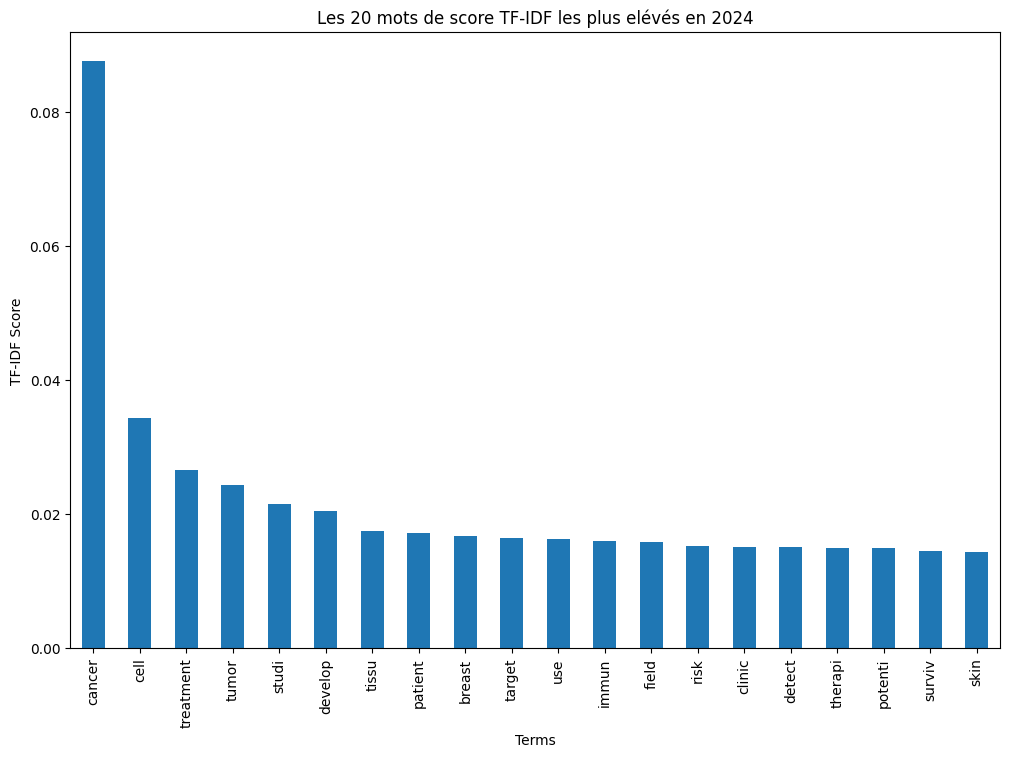

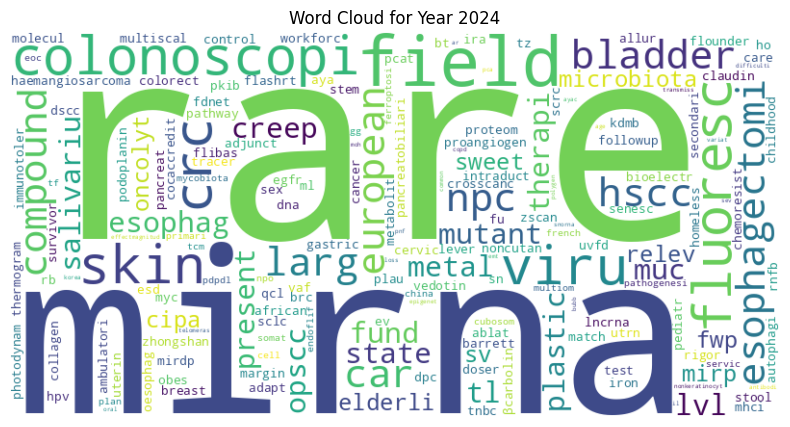

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud



df['Abstract_joined'] = df['Abstract'].apply(lambda x: ' '.join(x))

#print(df.head())

texts = df['Abstract_joined'].dropna().tolist()
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)
terms = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
print(tfidf_df.head())

tfidf_df['year'] = df['Year'].values

# Fonction de création du nuage de mots
def create_wordcloud(text, year):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Year {year}')
    plt.show()

for year, group in tfidf_df.groupby('year'):
    # Calcule des scores TF-IDF moyens pour chaque terme par année
    term_mean_tfidf = group.drop(columns=['year']).mean().sort_values(ascending=False)
    print(f"Top terms for year {year}")
    print(term_mean_tfidf.head(20))

    # Visualisation des termes les plus importants par année
    top_terms = term_mean_tfidf.head(20)

    #graphique en barres
    plt.figure(figsize=(12, 8))
    top_terms.plot(kind='bar')
    plt.title(f'Les 20 mots de score TF-IDF les plus elévés en {year}')
    plt.xlabel('Terms')
    plt.ylabel('TF-IDF Score')
    plt.show()

    # Nuage de mots pour chaque année
    combined_text = ' '.join(group.drop(columns=['year']).idxmax(axis=1))
    create_wordcloud(combined_text, year)

# ***Modélisation***

**Latent Dirichlet Allocation (LDA)**

In [38]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import CoherenceModel

In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Préparation des données
documents = df['Abstract'].tolist()

# Création du dictionnaire et du corpus
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Entraînement du modèle LDA
num_topics = 10
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

**Analyse des Corrélations entre Thèmes**

In [44]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.3442773225703362


**Stockage du modèle**

In [ ]:
all_topic_model = []
for topic in topics:
    topic_str = topic[1].split(' + ')
    topic_model = []
    for item in topic_str:
        weight, word = item.split('*')
        word = word.strip('"')
        topic_model.append((float(weight), word))
    all_topic_model.append(topic_model)

df_topic_model = pd.DataFrame(all_topic_model)
df_topic_model.rename(index = {0: "Topic 1", 1: "Topic 2", 2: "Topic 3", 3: "Topic 4", 4: "Topic 5", 5: "Topic 6", 6: "Topic 7", 7: "Topic 8", 8: "Topic 9", 9: "Topic 10"})

**Visualisation du modèle**

In [54]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
